In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_loc = r"C:\Users\Kushagra Jalota\Loan-Prediction-Classification-master\claim_trainnew.csv"
test_loc = r"C:\Users\Kushagra Jalota\Loan-Prediction-Classification-master\claim_testnew.csv"
train = pd.read_csv(train_loc)
test = pd.read_csv(test_loc)
data = pd.concat([train,test])

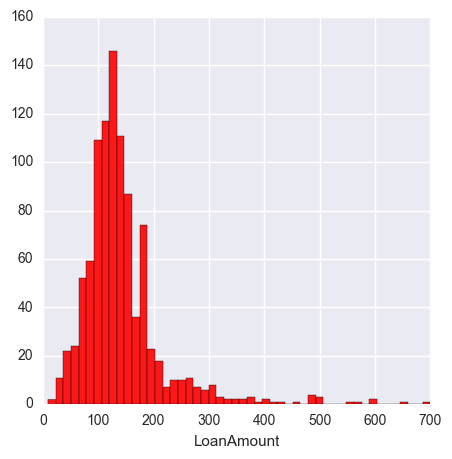

In [5]:
%matplotlib inline
#Now that we have removed null values let's conduct an exploratory data analysis to gain a 
#better understanding of our dataset.
plt.figure(figsize=(5,5))
sns.distplot(data['LoanAmount'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

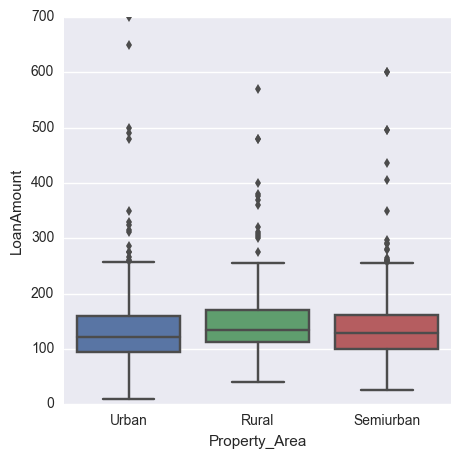

In [6]:
#The graph looks roughly like a Gaussian with a fat right tail, and large
#outlier values. This makes sense as house prices tend to lie around the average
#with some house being a lot more expensive than others. 

#Let's check to see how loan amounts and loan approvals vary by area.

plt.figure(figsize = (5, 5))
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',  data = train)

In [9]:
#All three property areas have similar means and interquartile ranges.
#However, we can see that urban properties have a much wider range.

#Let's now look at the spread of data between different categories and how home loan approval 
#rates vary between the different categorical groupings.

replace_dict = {'Y':1, 'N':0}
train.Loan_Status = train.Loan_Status.replace(replace_dict)
#We need to convert our target variable to numerical values to make the plots below work.

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

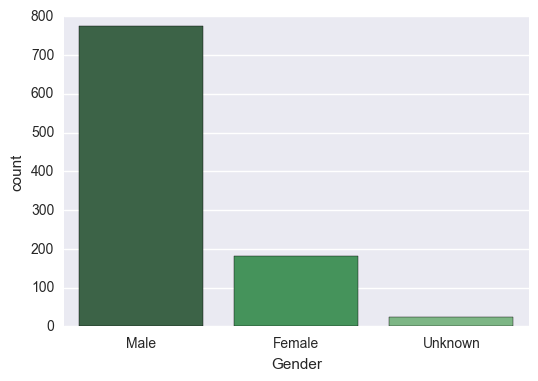

In [8]:
sns.countplot(x="Gender", data=data, palette="Greens_d")

#Males make up the vast majority of applicants for home loans.

In [10]:
gb = data.groupby(by=["Gender", "Loan_Status"])
gbs = gb.size()

female = (gbs[1] / (gbs[0] + gbs[1]))*100
male = (gbs[3] / (gbs[2] + gbs[3]))*100

print (female, male)

66.9642857143 69.3251533742


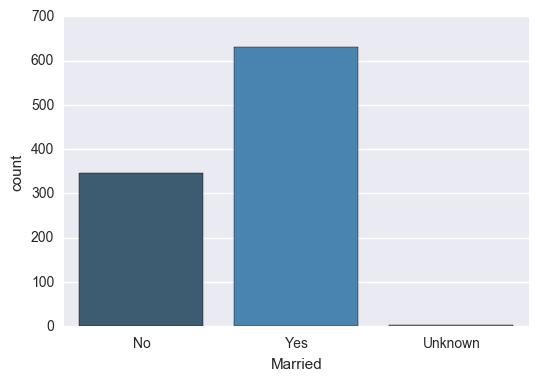

In [11]:
#Males we're approved loans slightly at a slightly higher rate than females.

sns.countplot(x="Married", data=data, palette="Blues_d")

#Most applicants are married.

In [12]:
gb = data.groupby(by=["Married", "Loan_Status"])
gbs = gb.size()

no = (gbs[1] / (gbs[0] + gbs[1]))*100
yes = (gbs[4] / (gbs[3] + gbs[4]))*100

print (no, yes)

62.9107981221 71.608040201


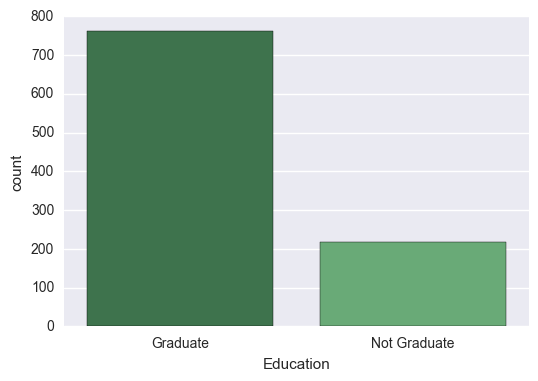

In [13]:
#Married people we're approved loans at a higher rate than females. We can
#hypothesize that this is because home ownership is generally related to
#something one does as a couple, rather than as an individual.

sns.countplot(x="Education", data=data, palette="Greens_d")

In [14]:
#Graduates make up the vast majority of applicants for home loans.

gb = data.groupby(by=["Education", "Loan_Status"])
gbs = gb.size()

graduate = (gbs[1] / (gbs[0] + gbs[1]))*100
not_grad = (gbs[3] / (gbs[2] + gbs[3]))*100

print (graduate, not_grad)

70.8333333333 61.1940298507


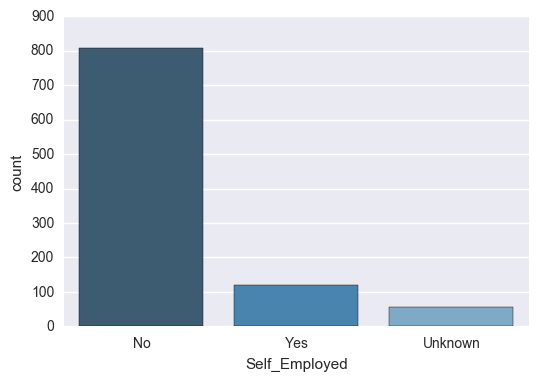

In [15]:
#Graduates we're approved loans at a higher rate than non graduates, again this
#makes intuitive sense.

sns.countplot(x="Self_Employed", data=data, palette="Blues_d")

In [16]:
#The vast majority of applicants are not self-employed.

gb = data.groupby(by=["Self_Employed", "Loan_Status"])
gbs = gb.size()

not_self = (gbs[1] / (gbs[0] + gbs[1]))*100
self = (gbs[5] / (gbs[4] + gbs[5]))*100

print (not_self, self)

68.6 68.2926829268


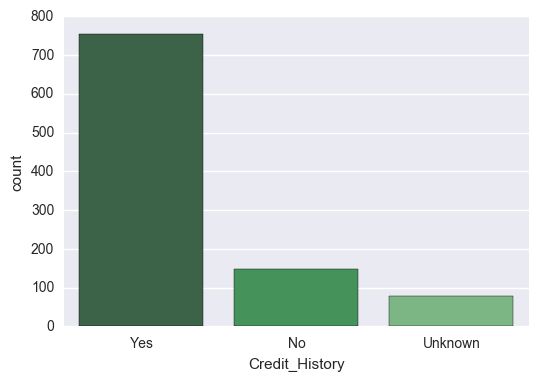

In [14]:
#Rates are almost identical between self employed and non self employed
#applicants. 

sns.countplot(x="Credit_History", data=data, palette="Greens_d")

In [15]:
#As one would hope the majority of applicants's credit history met the guidelines.

gb = data.groupby(by=["Credit_History", "Loan_Status"])
gbs = gb.size()

no = (gbs[1] / (gbs[0] + gbs[1]))*100
yes = (gbs[5] / (gbs[4] + gbs[5]))*100

print (yes, no)

79.5789473684 7.86516853933


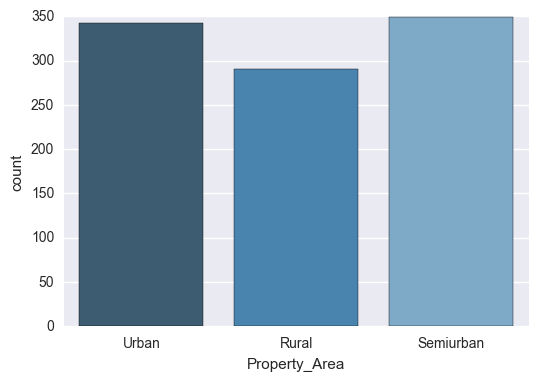

In [17]:
#No big suprise here. Only 7.8% of applicants whose credit history did not
#meet guidelines were approved loans, compared to 79.5% for those who history
#was up to scratch. An interesting question is why the 7.8% were approved
#housing loans. Perhaps this dataset hints at reasons for the trouble in the
#US housing market that sparked off the Great Recession.

sns.countplot(x="Property_Area", data=data, palette="Blues_d")

In [18]:
#All three property areas are well represented in the data set, with semiurban having slightly
#more appearances than urban.

gb = data.groupby(by=["Property_Area", "Loan_Status"])
gbs = gb.size()

rural = (gbs[1] / (gbs[0] + gbs[1]))*100
semiurban = (gbs[3] / (gbs[2] + gbs[3]))*100
urban = (gbs[5] / (gbs[4] + gbs[5]))*100

print (rural, semiurban, urban)

61.4525139665 76.8240343348 65.8415841584


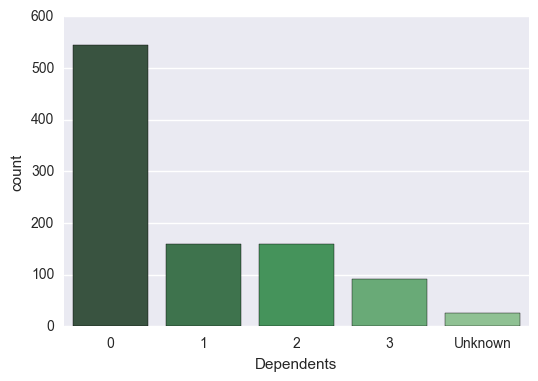

In [18]:
#Semiurban has the highest approval rate, some 15% higher than the lowest urban.
#Presumably semiurban refers to the suburbs, as far as I am aware these tend to
#be the most affluent areas in America. Those looking to live in such areas
#presumably command the incomes necessary to buy houses in those areas, and as
#a result banks end up approving more loans in these areas than in urban and
#rural areas.

sns.countplot(x="Dependents", data=data, palette="Greens_d")

In [19]:
#Most applicants for home loans do not have any dependents. 

gb = data.groupby(by=["Dependents", "Loan_Status"])
gbs = gb.size()

none = (gbs[1] / (gbs[0] + gbs[1]))*100
one = (gbs[3] / (gbs[2] + gbs[3]))*100
two = (gbs[5] / (gbs[4] + gbs[5]))*100
three = (gbs[7] / (gbs[6] + gbs[7]))*100

print (none, one, two, three)

68.9855072464 64.7058823529 75.2475247525 64.7058823529


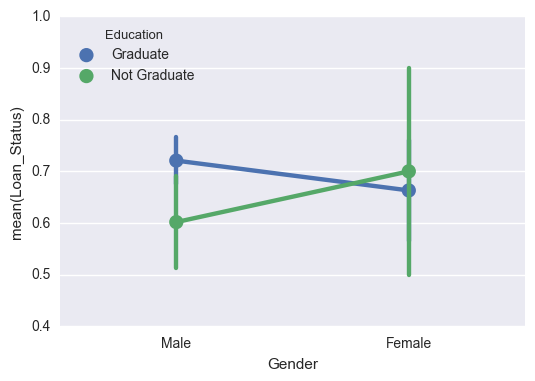

In [20]:
#Those with 2 dependents come out on top with those without dependents in second.
#1 and 3 or more dependents have near identical approval rates. 

train_no_unknown = train.drop(train[train.Gender == 'Unknown'].index)
sns.pointplot(x="Gender", y="Loan_Status",
              hue="Education", data=train_no_unknown)

In [20]:
#This concludes the EDA. Next I will attempt to predict the loan_status variable on the test set.